<a href="https://colab.research.google.com/github/erni26/pemograman_python/blob/main/pertemuan%2011_image%20classification%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [73]:
ls

 3scene@    daun_test2.jpg   forest_test.jpg  'Pertemuan 10.ipynb'
 dataset/   Erni.ipynb       nnmodel_scene/    Untitled0.ipynb


In [112]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [113]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [114]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((256, 256))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [115]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [116]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [117]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [118]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(438, 256, 256, 3)
(146, 256, 256, 3)


In [120]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(32, (3,3), activation='relu', input_shape=(256,256,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_35 (Flatten)         (None, 123008)            0         
_________________________________________________________________
dense_70 (Dense)             (None, 100)               12300900  
_________________________________________________________________
dense_71 (Dense)             (None, 5)               

In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(256*256*3,)),
        Dense(77, activation="relu", name="layer1"),
        Dense(36, activation="relu", name="layer2"),
        Dense(18, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
layer1 (Dense)               (None, 77)                11590733  
_________________________________________________________________
layer2 (Dense)               (None, 36)                2808      
_________________________________________________________________
layer3 (Dense)               (None, 18)                666       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 57        
Total params: 11,594,264
Trainable params: 11,594,264
Non-trainable params: 0
_________________________________________________________________


In [121]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [122]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 28s 2s/step - loss: 5.6820 - accuracy: 0.2009 - val_loss: 1.6190 - val_accuracy: 0.1986
Epoch 2/25
14/14 [==============================] - 28s 2s/step - loss: 1.5649 - accuracy: 0.3105 - val_loss: 1.5465 - val_accuracy: 0.3082
Epoch 3/25
14/14 [==============================] - 28s 2s/step - loss: 1.3379 - accuracy: 0.4247 - val_loss: 1.2620 - val_accuracy: 0.5205
Epoch 4/25
14/14 [==============================] - 28s 2s/step - loss: 1.0018 - accuracy: 0.6027 - val_loss: 1.0073 - val_accuracy: 0.6096
Epoch 5/25
14/14 [==============================] - 28s 2s/step - loss: 0.7392 - accuracy: 0.6941 - val_loss: 1.0513 - val_accuracy: 0.6096
Epoch 6/25
14/14 [==============================] - 28s 2s/step - loss: 0.5619 - accuracy: 0.7717 - val_loss: 0.8368 - val_accuracy: 0.6781
Epoch 7/25
14/14 [==============================] - 29s 2s/step - loss: 0.3619 - accuracy: 0.8904 - val_loss: 0.8288 - val_accuracy: 0.6986
Epoch 8/25
14/14 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


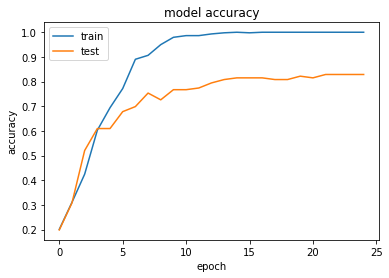

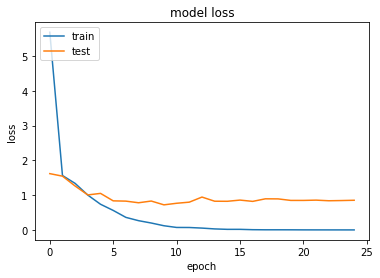

In [123]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [124]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
  predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.86      0.86      0.86        35
      GMB_02       0.71      0.83      0.77        24
      GMB_03       0.92      0.81      0.86        27
      GMB_04       0.76      0.76      0.76        29
      GMB_05       0.90      0.87      0.89        31

    accuracy                           0.83       146
   macro avg       0.83      0.83      0.83       146
weighted avg       0.83      0.83      0.83       146



In [125]:
model1.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [126]:
import cv2
import matplotlib.pyplot as plt
image1='daun_test2.jpg'

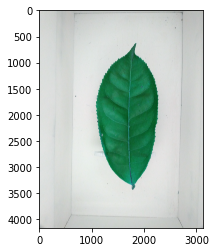

In [127]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [128]:
image_testing = Image.open('forest_test.jpg')
image_testing = np.array(image_testing.resize((256, 256))) / 255.0
image_testing.shape

(256, 256, 3)

In [129]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 256, 256, 3)
